In [1]:
from multi_imbalance.datasets import load_datasets
import experiment_v2 as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from utils import plot_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [2]:
datasets = load_datasets()

In [3]:
ds_name = 'dermatology'
test_on_all_folds = True
test_all_ds = True

In [4]:
datasets = ex.one_hot_encode_all(datasets)

In [5]:
config = ex.config_calculation_strategy2(datasets)

In [6]:
config = ex.config_tuned_for_lda(config)

In [7]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 0.004,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 130},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 12},
  'weighted_triplet_loss': True,
  'lr': 0.04,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 90},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 10},
  'weighted_triplet_loss': True,
  'lr': 0.04,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 90},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 128,
   'units_3rd_layer': 64,
   'units_latent_layer': 8},
  'weighted_triplet_loss': True,
  'lr': 0.004,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 120},
 'balance-scale': {'nn_config': {'un

In [8]:
def instantiate_classifiers():
    classifiers = {
            "RF24": RandomForestClassifier(random_state=0, min_samples_leaf=2, min_samples_split=4, class_weight='balanced'),
            "DT": DecisionTreeClassifier(random_state=0, min_samples_split=4, min_samples_leaf=2, class_weight='balanced'),
            "KNN": KNeighborsClassifier(n_neighbors=1),
            "QDA": QuadraticDiscriminantAnalysis(),
            "LDA": LinearDiscriminantAnalysis()
        } 
    return classifiers

In [9]:
from experiment import dt_name_to_cols_to_encode, dt_name_minority_classes

In [10]:
from sklearn.neighbors import KNeighborsClassifier

def calc_safety5(X,y):
    result = {
        "safe":0,
        "borderline":0,
        "rare":0,
        "outlier":0
    }
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X, y)
    neighbors = neigh.kneighbors(X, 5+1, False)
    for i, (x, nbors) in enumerate(list(zip(X, neighbors))):
        same_class_nbrs = (y[nbors[1:]] == y[i]).sum()
        if same_class_nbrs >= 4:
            result['safe'] += 1
        elif same_class_nbrs >= 2:
            result['borderline'] += 1
        elif same_class_nbrs == 1:
            result['rare'] += 1
        else:
            result['outlier'] += 1
    return result

In [11]:
def standardize(X_train, X_test):
    means = X_train.mean(axis=0)
    stds = X_train.std(axis=0)
    return (X_train - means) / (stds+1e-6), (X_test - means) / (stds + 1e-6)

cmc


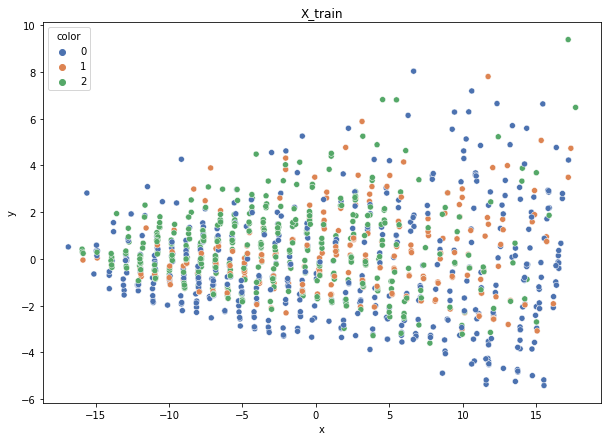

Class cardinalities: Counter({0: 503, 2: 409, 1: 266})
Weights: {0: 0.2426709552796112, 1: 0.45888530265279864, 2: 0.29844374206759033}


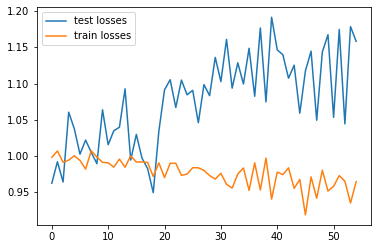

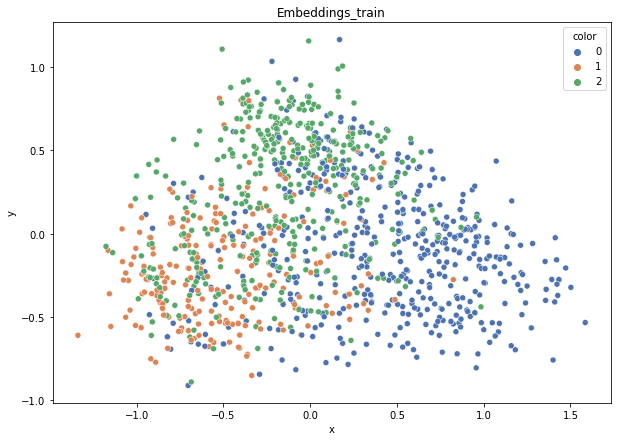

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn

DT-f1-new-features: 0.45
DT-f1-old+new-features: 0.461
DT-f1-old-features: 0.469
DT-gmean-new-features: 0.457
DT-gmean-old+new-features: 0.473
DT-gmean-old-features: 0.467
DT-minority_gmean-new-features: 0.008
DT-minority_gmean-old+new-features: 0.008
DT-minority_gmean-old-features: 0.007
KNN-f1-new-features: 0.458
KNN-f1-old+new-features: 0.43
KNN-f1-old-features: 0.431
KNN-gmean-new-features: 0.456
KNN-gmean-old+new-features: 0.429
KNN-gmean-old-features: 0.425
KNN-minority_gmean-new-features: 0.007
KNN-minority_gmean-old+new-features: 0.007
KNN-minority_gmean-old-features: 0.007
LDA-f1-new-features: 0.539
LDA-f1-old+new-features: 0.524
LDA-f1-old-features: 0.482
LDA-gmean-new-features: 0.547
LDA-gmean-old+new-features: 0.53
LDA-gmean-old-features: 0.47
LDA-minority_gmean-new-features: 0.008
LDA-minority_gmean-old+new-features: 0.008
LDA-minority_gmean-old-features: 0.007
QDA-f1-new-features: 0.521
QDA-f1-old+new-features: 0.491
QDA-f1-old-features: 0.483
QDA-gmean-new-features: 0.53

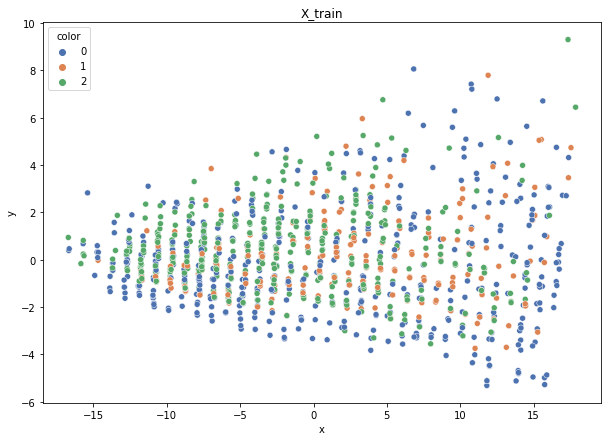

Class cardinalities: Counter({0: 503, 2: 409, 1: 266})
Weights: {0: 0.2426709552796112, 1: 0.45888530265279864, 2: 0.29844374206759033}


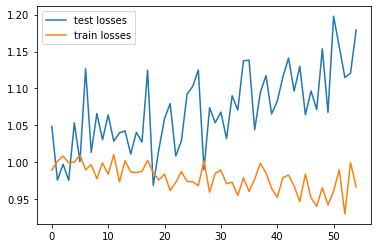

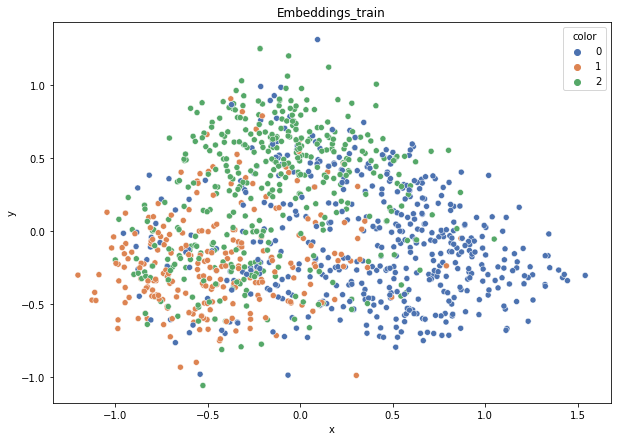

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn

DT-f1-new-features: 0.464
DT-f1-old+new-features: 0.494
DT-f1-old-features: 0.491
DT-gmean-new-features: 0.468
DT-gmean-old+new-features: 0.497
DT-gmean-old-features: 0.503
DT-minority_gmean-new-features: 0.008
DT-minority_gmean-old+new-features: 0.008
DT-minority_gmean-old-features: 0.008
KNN-f1-new-features: 0.468
KNN-f1-old+new-features: 0.438
KNN-f1-old-features: 0.443
KNN-gmean-new-features: 0.466
KNN-gmean-old+new-features: 0.43
KNN-gmean-old-features: 0.433
KNN-minority_gmean-new-features: 0.008
KNN-minority_gmean-old+new-features: 0.007
KNN-minority_gmean-old-features: 0.007
LDA-f1-new-features: 0.522
LDA-f1-old+new-features: 0.524
LDA-f1-old-features: 0.501
LDA-gmean-new-features: 0.522
LDA-gmean-old+new-features: 0.522
LDA-gmean-old-features: 0.49
LDA-minority_gmean-new-features: 0.008
LDA-minority_gmean-old+new-features: 0.008
LDA-minority_gmean-old-features: 0.007
QDA-f1-new-features: 0.544
QDA-f1-old+new-features: 0.554
QDA-f1-old-features: 0.513
QDA-gmean-new-features: 0.

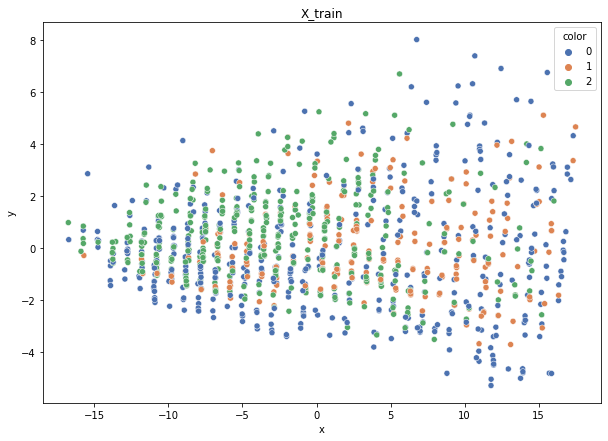

Class cardinalities: Counter({0: 503, 2: 408, 1: 267})
Weights: {0: 0.2429107547813522, 1: 0.45761838822104933, 2: 0.29947085699759846}


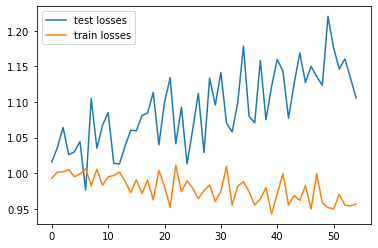

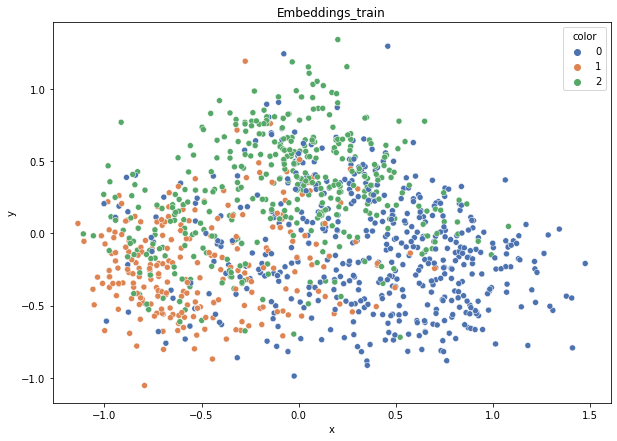

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn

DT-f1-new-features: 0.452
DT-f1-old+new-features: 0.468
DT-f1-old-features: 0.462
DT-gmean-new-features: 0.443
DT-gmean-old+new-features: 0.465
DT-gmean-old-features: 0.46
DT-minority_gmean-new-features: 0.007
DT-minority_gmean-old+new-features: 0.007
DT-minority_gmean-old-features: 0.007
KNN-f1-new-features: 0.448
KNN-f1-old+new-features: 0.417
KNN-f1-old-features: 0.413
KNN-gmean-new-features: 0.443
KNN-gmean-old+new-features: 0.402
KNN-gmean-old-features: 0.399
KNN-minority_gmean-new-features: 0.007
KNN-minority_gmean-old+new-features: 0.007
KNN-minority_gmean-old-features: 0.007
LDA-f1-new-features: 0.515
LDA-f1-old+new-features: 0.518
LDA-f1-old-features: 0.447
LDA-gmean-new-features: 0.507
LDA-gmean-old+new-features: 0.513
LDA-gmean-old-features: 0.425
LDA-minority_gmean-new-features: 0.008
LDA-minority_gmean-old+new-features: 0.008
LDA-minority_gmean-old-features: 0.007
QDA-f1-new-features: 0.492
QDA-f1-old+new-features: 0.5
QDA-f1-old-features: 0.486
QDA-gmean-new-features: 0.4

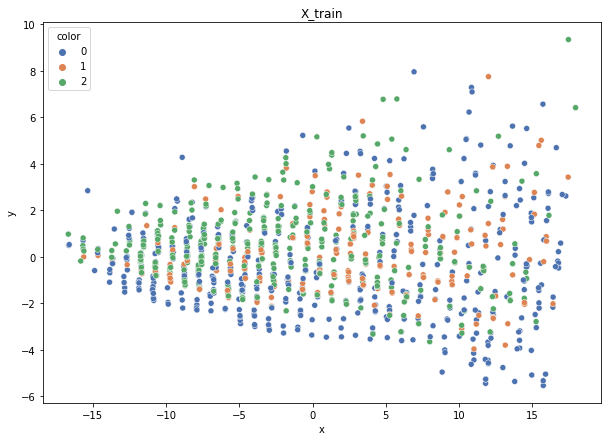

Class cardinalities: Counter({0: 503, 2: 409, 1: 267})
Weights: {0: 0.24308874498865835, 1: 0.4579537031059744, 2: 0.29895755190536716}


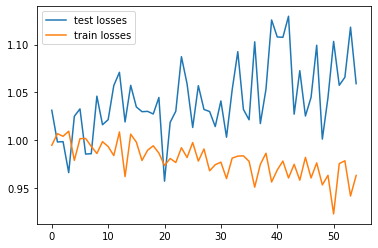

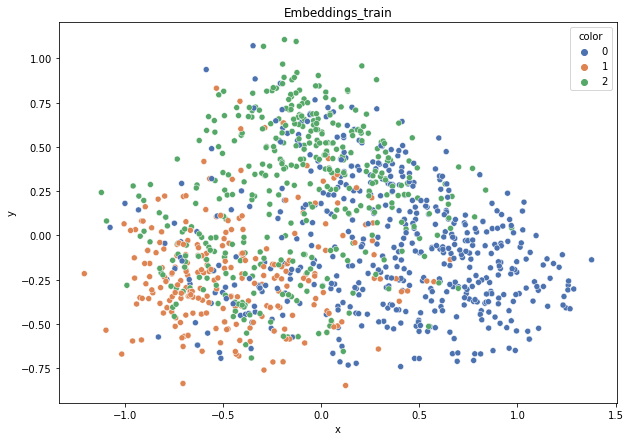

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn

DT-f1-new-features: 0.457
DT-f1-old+new-features: 0.432
DT-f1-old-features: 0.44
DT-gmean-new-features: 0.453
DT-gmean-old+new-features: 0.428
DT-gmean-old-features: 0.438
DT-minority_gmean-new-features: 0.007
DT-minority_gmean-old+new-features: 0.007
DT-minority_gmean-old-features: 0.007
KNN-f1-new-features: 0.449
KNN-f1-old+new-features: 0.431
KNN-f1-old-features: 0.418
KNN-gmean-new-features: 0.439
KNN-gmean-old+new-features: 0.425
KNN-gmean-old-features: 0.413
KNN-minority_gmean-new-features: 0.007
KNN-minority_gmean-old+new-features: 0.007
KNN-minority_gmean-old-features: 0.007
LDA-f1-new-features: 0.538
LDA-f1-old+new-features: 0.526
LDA-f1-old-features: 0.485
LDA-gmean-new-features: 0.523
LDA-gmean-old+new-features: 0.512
LDA-gmean-old-features: 0.451
LDA-minority_gmean-new-features: 0.007
LDA-minority_gmean-old+new-features: 0.007
LDA-minority_gmean-old-features: 0.006
QDA-f1-new-features: 0.525
QDA-f1-old+new-features: 0.513
QDA-f1-old-features: 0.516
QDA-gmean-new-features: 0

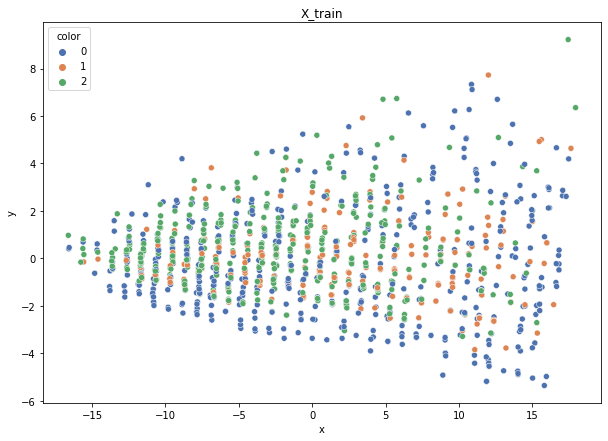

Class cardinalities: Counter({0: 504, 2: 409, 1: 266})
Weights: {0: 0.24230613326681422, 1: 0.4591063577687006, 2: 0.29858750896448505}


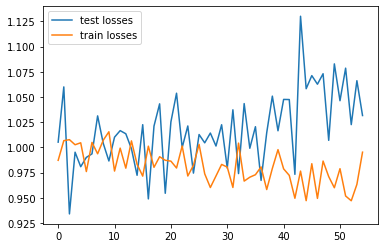

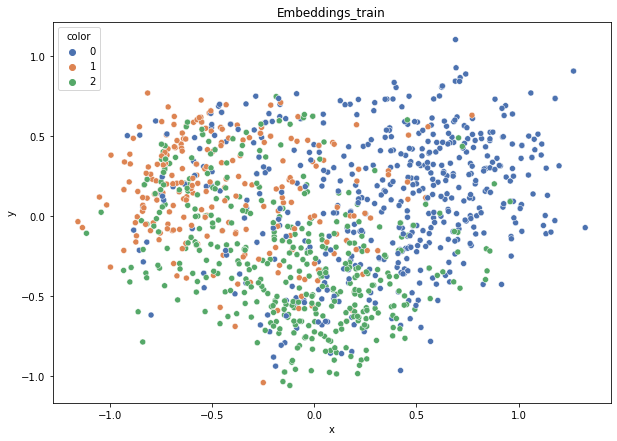

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn

DT-f1-new-features: 0.497
DT-f1-old+new-features: 0.46
DT-f1-old-features: 0.473
DT-gmean-new-features: 0.495
DT-gmean-old+new-features: 0.458
DT-gmean-old-features: 0.483
DT-minority_gmean-new-features: 0.007
DT-minority_gmean-old+new-features: 0.007
DT-minority_gmean-old-features: 0.008
KNN-f1-new-features: 0.45
KNN-f1-old+new-features: 0.413
KNN-f1-old-features: 0.408
KNN-gmean-new-features: 0.438
KNN-gmean-old+new-features: 0.398
KNN-gmean-old-features: 0.394
KNN-minority_gmean-new-features: 0.007
KNN-minority_gmean-old+new-features: 0.007
KNN-minority_gmean-old-features: 0.007
LDA-f1-new-features: 0.54
LDA-f1-old+new-features: 0.522
LDA-f1-old-features: 0.527
LDA-gmean-new-features: 0.537
LDA-gmean-old+new-features: 0.513
LDA-gmean-old-features: 0.509
LDA-minority_gmean-new-features: 0.008
LDA-minority_gmean-old+new-features: 0.007
LDA-minority_gmean-old-features: 0.007
QDA-f1-new-features: 0.533
QDA-f1-old+new-features: 0.498
QDA-f1-old-features: 0.542
QDA-gmean-new-features: 0.5

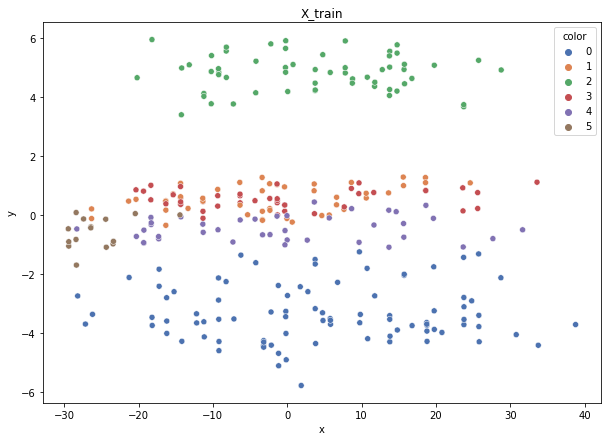

Class cardinalities: Counter({0: 90, 2: 58, 1: 48, 4: 41, 3: 39, 5: 16})
Weights: {1: 0.1288257963857323, 0: 0.0687070914057239, 2: 0.10661445218129569, 4: 0.15082044454915, 3: 0.1585548263209013, 5: 0.38647738915719687}


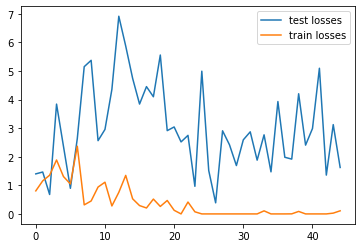

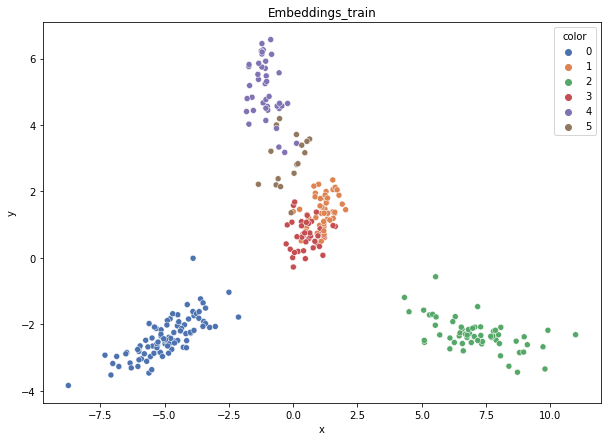

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DT-f1-new-features: 0.932
DT-f1-old+new-features: 0.922
DT-f1-old-features: 0.914
DT-gmean-new-features: 0.927
DT-gmean-old+new-features: 0.908
DT-gmean-old-features: 0.911
DT-minority_gmean-new-features: 1.0
DT-minority_gmean-old+new-features: 1.0
DT-minority_gmean-old-features: 1.0
KNN-f1-new-features: 0.959
KNN-f1-old+new-features: 0.932
KNN-f1-old-features: 0.944
KNN-gmean-new-features: 0.957
KNN-gmean-old+new-features: 0.929
KNN-gmean-old-features: 0.941
KNN-minority_gmean-new-features: 1.0
KNN-minority_gmean-old+new-features: 1.0
KNN-minority_gmean-old-features: 1.0
LDA-f1-new-features: 0.959
LDA-f1-old+new-features: 0.946
LDA-f1-old-features: 0.943
LDA-gmean-new-features: 0.957
LDA-gmean-old+new-features: 0.945
LDA-gmean-old-features: 0.942
LDA-minority_gmean-new-features: 1.0
LDA-minority_gmean-old+new-features: 1.0
LDA-minority_gmean-old-features: 1.0
QDA-f1-new-features: 0.771
QDA-f1-old+new-features: 0.872
QDA-f1-old-features: 0.749
QDA-gmean-new-features: 0.303
QDA-gmean-ol

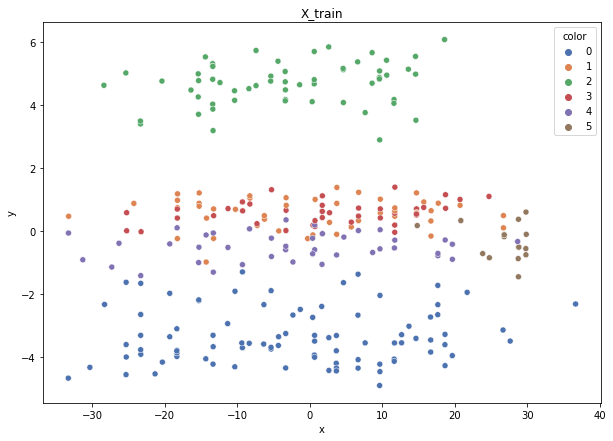

Class cardinalities: Counter({0: 89, 2: 58, 1: 49, 4: 41, 3: 40, 5: 16})
Weights: {1: 0.1269355878601628, 2: 0.10723868629565478, 0: 0.06988588545110087, 4: 0.1517035074426336, 3: 0.15549609512869944, 5: 0.3887402378217486}


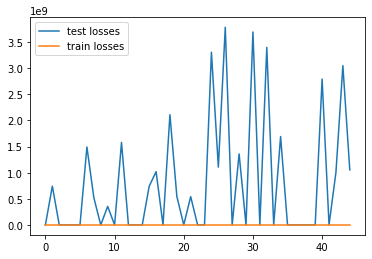

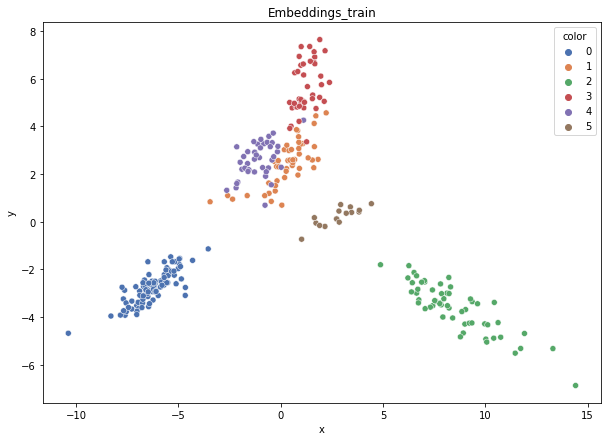

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3

DT-f1-new-features: 0.845
DT-f1-old+new-features: 0.909
DT-f1-old-features: 0.955
DT-gmean-new-features: 0.823
DT-gmean-old+new-features: 0.903
DT-gmean-old-features: 0.955
DT-minority_gmean-new-features: 1.0
DT-minority_gmean-old+new-features: 1.0
DT-minority_gmean-old-features: 1.0
KNN-f1-new-features: 0.92
KNN-f1-old+new-features: 0.936
KNN-f1-old-features: 0.952
KNN-gmean-new-features: 0.914
KNN-gmean-old+new-features: 0.935
KNN-gmean-old-features: 0.951
KNN-minority_gmean-new-features: 1.0
KNN-minority_gmean-old+new-features: 1.0
KNN-minority_gmean-old-features: 1.0
LDA-f1-new-features: 0.926
LDA-f1-old+new-features: 0.926
LDA-f1-old-features: 0.968
LDA-gmean-new-features: 0.934
LDA-gmean-old+new-features: 0.934
LDA-gmean-old-features: 0.97
LDA-minority_gmean-new-features: 1.0
LDA-minority_gmean-old+new-features: 1.0
LDA-minority_gmean-old-features: 1.0
QDA-f1-new-features: 0.733
QDA-f1-old+new-features: 0.926
QDA-f1-old-features: 0.786
QDA-gmean-new-features: 0.289
QDA-gmean-old+

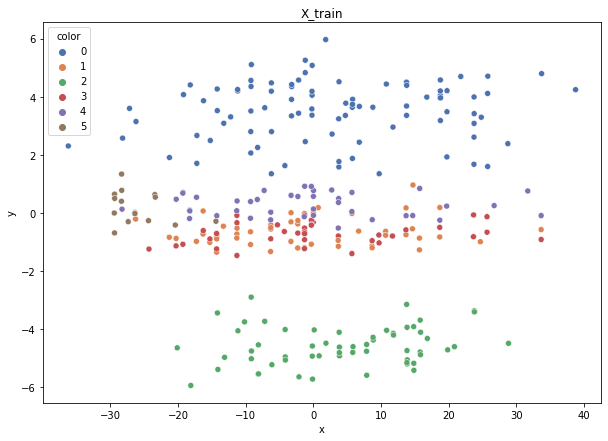

Class cardinalities: Counter({0: 89, 2: 58, 1: 49, 4: 42, 3: 39, 5: 16})
Weights: {0: 0.06985968170695418, 2: 0.10719847710205038, 4: 0.14803599218854577, 3: 0.15942337620304928, 1: 0.1268879933044678, 5: 0.38859447949493264}


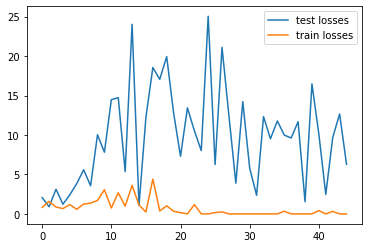

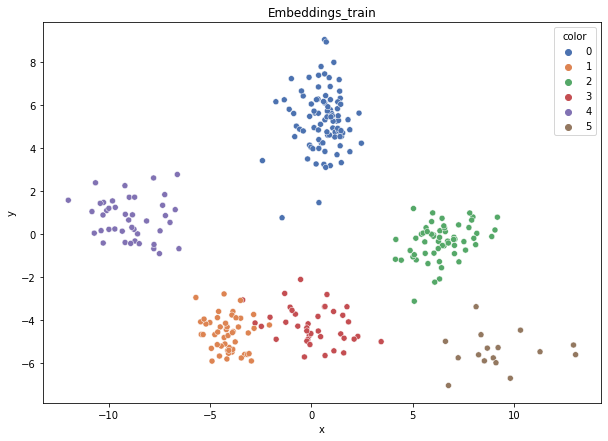

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DT-f1-new-features: 0.956
DT-f1-old+new-features: 0.947
DT-f1-old-features: 0.945
DT-gmean-new-features: 0.953
DT-gmean-old+new-features: 0.935
DT-gmean-old-features: 0.953
DT-minority_gmean-new-features: 1.0
DT-minority_gmean-old+new-features: 1.0
DT-minority_gmean-old-features: 1.0
KNN-f1-new-features: 0.943
KNN-f1-old+new-features: 0.969
KNN-f1-old-features: 0.906
KNN-gmean-new-features: 0.95
KNN-gmean-old+new-features: 0.963
KNN-gmean-old-features: 0.891
KNN-minority_gmean-new-features: 1.0
KNN-minority_gmean-old+new-features: 1.0
KNN-minority_gmean-old-features: 1.0
LDA-f1-new-features: 0.969
LDA-f1-old+new-features: 0.954
LDA-f1-old-features: 0.922
LDA-gmean-new-features: 0.963
LDA-gmean-old+new-features: 0.95
LDA-gmean-old-features: 0.913
LDA-minority_gmean-new-features: 1.0
LDA-minority_gmean-old+new-features: 1.0
LDA-minority_gmean-old-features: 1.0
QDA-f1-new-features: 0.752
QDA-f1-old+new-features: 0.88
QDA-f1-old-features: 0.865
QDA-gmean-new-features: 0.296
QDA-gmean-old+n

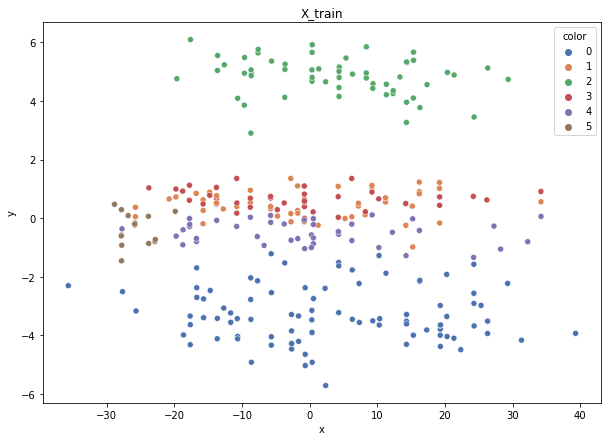

Class cardinalities: Counter({0: 90, 2: 57, 1: 49, 4: 42, 3: 39, 5: 16})
Weights: {1: 0.12674800566460384, 0: 0.06900724752850654, 2: 0.10895881188711559, 4: 0.14787267327537115, 3: 0.15924749429655355, 5: 0.3881657673478493}


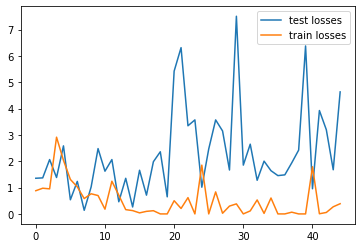

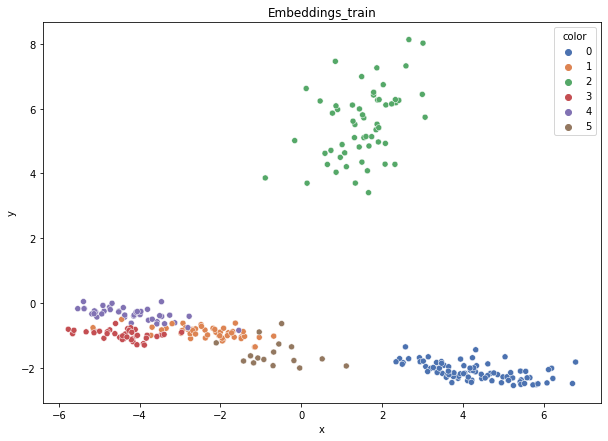

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3

DT-f1-new-features: 0.923
DT-f1-old+new-features: 0.927
DT-f1-old-features: 0.946
DT-gmean-new-features: 0.918
DT-gmean-old+new-features: 0.924
DT-gmean-old-features: 0.945
DT-minority_gmean-new-features: 1.0
DT-minority_gmean-old+new-features: 1.0
DT-minority_gmean-old-features: 1.0
KNN-f1-new-features: 0.969
KNN-f1-old+new-features: 0.954
KNN-f1-old-features: 0.939
KNN-gmean-new-features: 0.963
KNN-gmean-old+new-features: 0.953
KNN-gmean-old-features: 0.937
KNN-minority_gmean-new-features: 1.0
KNN-minority_gmean-old+new-features: 1.0
KNN-minority_gmean-old-features: 1.0
LDA-f1-new-features: 0.969
LDA-f1-old+new-features: 0.969
LDA-f1-old-features: 0.969
LDA-gmean-new-features: 0.963
LDA-gmean-old+new-features: 0.963
LDA-gmean-old-features: 0.968
LDA-minority_gmean-new-features: 1.0
LDA-minority_gmean-old+new-features: 1.0
LDA-minority_gmean-old-features: 1.0
QDA-f1-new-features: 0.792
QDA-f1-old+new-features: 0.788
QDA-f1-old-features: 0.652
QDA-gmean-new-features: 0.311
QDA-gmean-ol

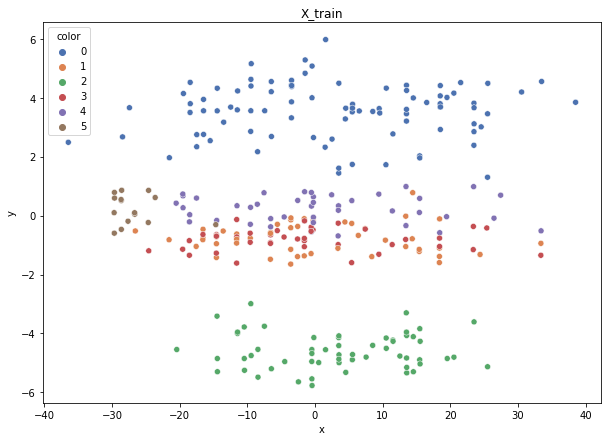

Class cardinalities: Counter({0: 90, 2: 57, 1: 49, 4: 42, 3: 39, 5: 16})
Weights: {1: 0.12674800566460384, 0: 0.06900724752850654, 2: 0.10895881188711559, 3: 0.15924749429655355, 4: 0.14787267327537115, 5: 0.3881657673478493}


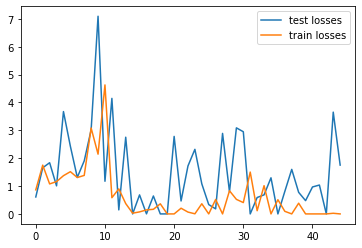

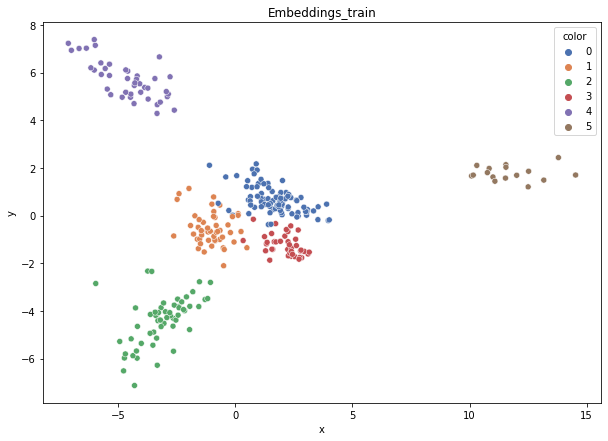

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/dhorna/anaconda3

DT-f1-new-features: 0.887
DT-f1-old+new-features: 0.932
DT-f1-old-features: 0.989
DT-gmean-new-features: 0.859
DT-gmean-old+new-features: 0.911
DT-gmean-old-features: 0.992
DT-minority_gmean-new-features: 0.027
DT-minority_gmean-old+new-features: 0.027
DT-minority_gmean-old-features: 1.0
KNN-f1-new-features: 0.969
KNN-f1-old+new-features: 1.0
KNN-f1-old-features: 0.944
KNN-gmean-new-features: 0.963
KNN-gmean-old+new-features: 1.0
KNN-gmean-old-features: 0.942
KNN-minority_gmean-new-features: 1.0
KNN-minority_gmean-old+new-features: 1.0
KNN-minority_gmean-old-features: 1.0
LDA-f1-new-features: 1.0
LDA-f1-old+new-features: 1.0
LDA-f1-old-features: 0.989
LDA-gmean-new-features: 1.0
LDA-gmean-old+new-features: 1.0
LDA-gmean-old-features: 0.992
LDA-minority_gmean-new-features: 1.0
LDA-minority_gmean-old+new-features: 1.0
LDA-minority_gmean-old-features: 1.0
QDA-f1-new-features: 0.804
QDA-f1-old+new-features: 0.946
QDA-f1-old-features: 0.835
QDA-gmean-new-features: 0.312
QDA-gmean-old+new-fe

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


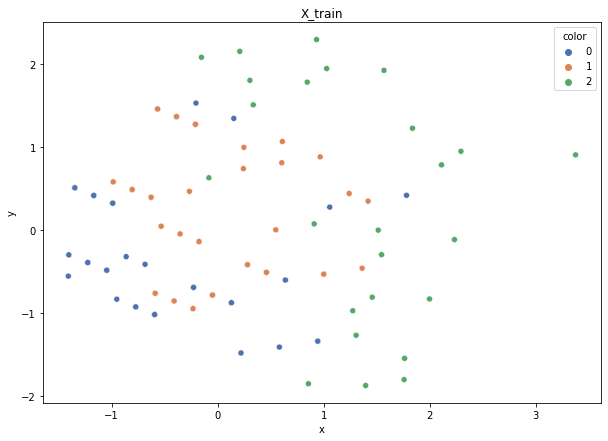

Class cardinalities: Counter({0: 52, 1: 51, 2: 25})
Weights: {0: 0.243925770040176, 1: 0.24870862827625786, 2: 0.507365601683566}


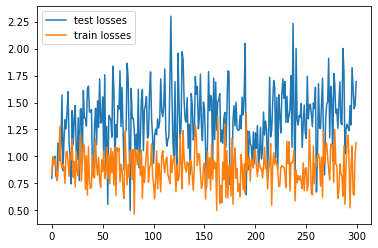

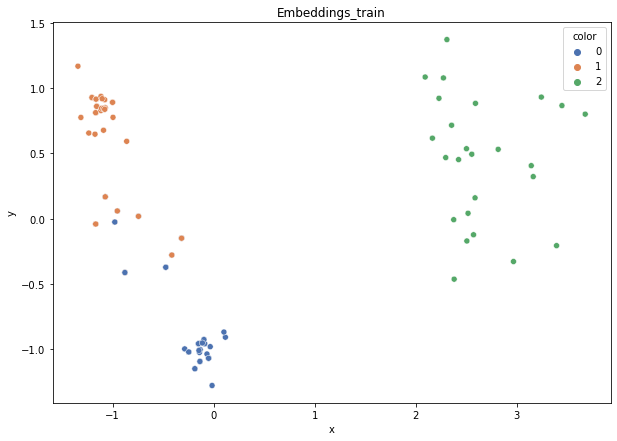

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DT-f1-new-features: 0.867
DT-f1-old+new-features: 0.867
DT-f1-old-features: 0.842
DT-gmean-new-features: 0.851
DT-gmean-old+new-features: 0.851
DT-gmean-old-features: 0.828
DT-minority_gmean-new-features: 1.0
DT-minority_gmean-old+new-features: 1.0
DT-minority_gmean-old-features: 1.0
KNN-f1-new-features: 0.897
KNN-f1-old+new-features: 0.897
KNN-f1-old-features: 0.733
KNN-gmean-new-features: 0.895
KNN-gmean-old+new-features: 0.895
KNN-gmean-old-features: 0.688
KNN-minority_gmean-new-features: 1.0
KNN-minority_gmean-old+new-features: 1.0
KNN-minority_gmean-old-features: 0.022
LDA-f1-new-features: 0.923
LDA-f1-old+new-features: 0.923
LDA-f1-old-features: 0.57
LDA-gmean-new-features: 0.921
LDA-gmean-old+new-features: 0.921
LDA-gmean-old-features: 0.549
LDA-minority_gmean-new-features: 1.0
LDA-minority_gmean-old+new-features: 1.0
LDA-minority_gmean-old-features: 0.026
QDA-f1-new-features: 0.923
QDA-f1-old+new-features: 0.923
QDA-f1-old-features: 0.58
QDA-gmean-new-features: 0.921
QDA-gmean-

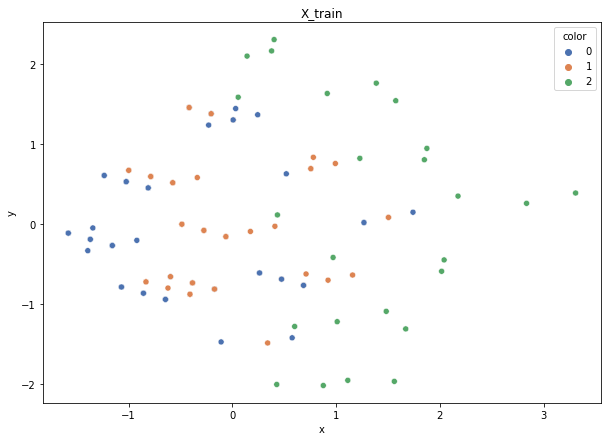

Class cardinalities: Counter({0: 52, 1: 51, 2: 25})
Weights: {0: 0.243925770040176, 1: 0.24870862827625786, 2: 0.507365601683566}


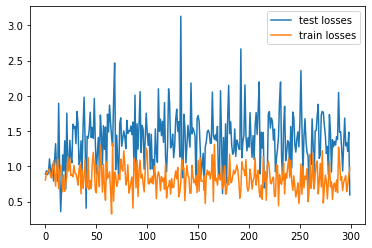

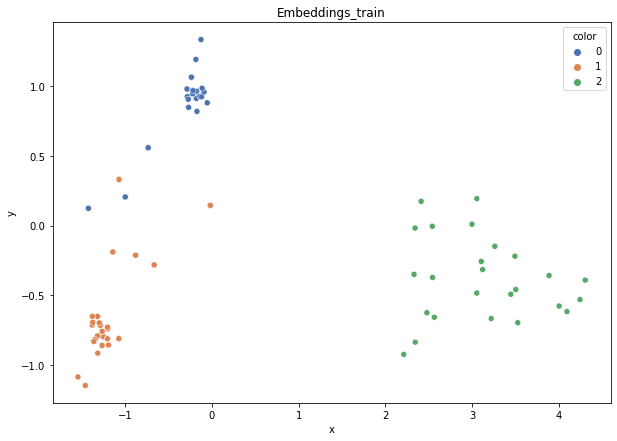

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DT-f1-new-features: 0.897
DT-f1-old+new-features: 0.897
DT-f1-old-features: 0.872
DT-gmean-new-features: 0.895
DT-gmean-old+new-features: 0.895
DT-gmean-old-features: 0.867
DT-minority_gmean-new-features: 1.0
DT-minority_gmean-old+new-features: 1.0
DT-minority_gmean-old-features: 1.0
KNN-f1-new-features: 0.897
KNN-f1-old+new-features: 0.87
KNN-f1-old-features: 0.643
KNN-gmean-new-features: 0.892
KNN-gmean-old+new-features: 0.861
KNN-gmean-old-features: 0.619
KNN-minority_gmean-new-features: 1.0
KNN-minority_gmean-old+new-features: 1.0
KNN-minority_gmean-old-features: 0.008
LDA-f1-new-features: 0.845
LDA-f1-old+new-features: 0.872
LDA-f1-old-features: 0.439
LDA-gmean-new-features: 0.837
LDA-gmean-old+new-features: 0.867
LDA-gmean-old-features: 0.414
LDA-minority_gmean-new-features: 1.0
LDA-minority_gmean-old+new-features: 1.0
LDA-minority_gmean-old-features: 0.018
QDA-f1-new-features: 0.872
QDA-f1-old+new-features: 0.872
QDA-f1-old-features: 0.54
QDA-gmean-new-features: 0.867
QDA-gmean-

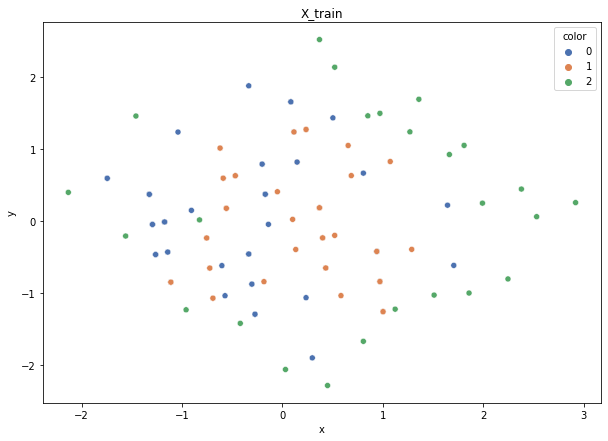

Class cardinalities: Counter({0: 52, 1: 51, 2: 25})
Weights: {0: 0.243925770040176, 1: 0.24870862827625786, 2: 0.507365601683566}


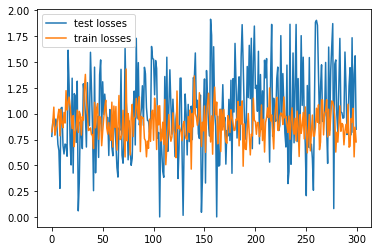

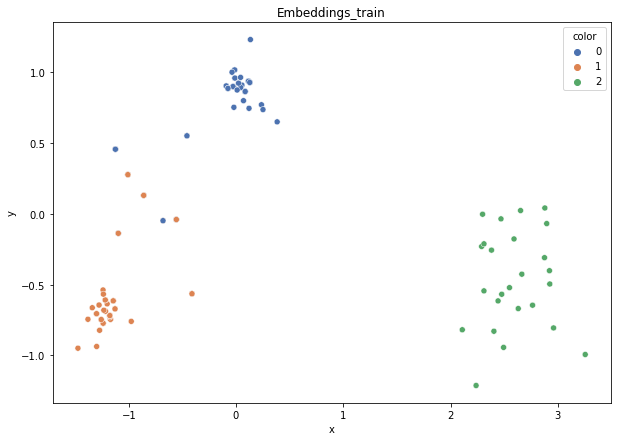

/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DT-f1-new-features: 0.923
DT-f1-old+new-features: 0.882
DT-f1-old-features: 0.923
DT-gmean-new-features: 0.921
DT-gmean-old+new-features: 0.867
DT-gmean-old-features: 0.921
DT-minority_gmean-new-features: 1.0
DT-minority_gmean-old+new-features: 0.029
DT-minority_gmean-old-features: 1.0
KNN-f1-new-features: 0.923
KNN-f1-old+new-features: 0.923
KNN-f1-old-features: 0.836
KNN-gmean-new-features: 0.921
KNN-gmean-old+new-features: 0.921
KNN-gmean-old-features: 0.805
KNN-minority_gmean-new-features: 1.0
KNN-minority_gmean-old+new-features: 1.0
KNN-minority_gmean-old-features: 0.026
LDA-f1-new-features: 0.923
LDA-f1-old+new-features: 0.923
LDA-f1-old-features: 0.565
LDA-gmean-new-features: 0.921
LDA-gmean-old+new-features: 0.921
LDA-gmean-old-features: 0.474
LDA-minority_gmean-new-features: 1.0
LDA-minority_gmean-old+new-features: 1.0
LDA-minority_gmean-old-features: 1.0
QDA-f1-new-features: 0.923
QDA-f1-old+new-features: 0.923
QDA-f1-old-features: 0.666
QDA-gmean-new-features: 0.921
QDA-gmea

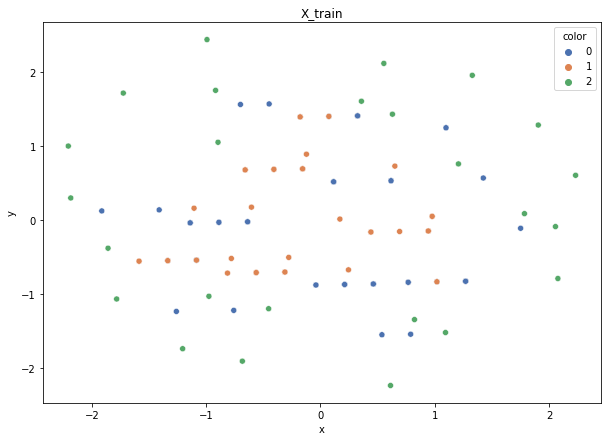

Class cardinalities: Counter({0: 52, 1: 51, 2: 25})
Weights: {1: 0.24870862827625786, 2: 0.507365601683566, 0: 0.243925770040176}


In [ ]:
result_dict = defaultdict(list)

std_dict = defaultdict(list)

safety_dict = defaultdict(list)

if test_all_ds:
    ds_names = dt_name_to_cols_to_encode.keys()
else:
    ds_names = [ds_name]
for dataset_name in ds_names:
# for dataset_name in list(datasets.keys()):
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    fold_result_dict = defaultdict(list)
    
    safety_dict["dataset"].append(dataset_name)
    fold_safety_dict = defaultdict(list)

    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    X_encoded, y = datasets[f"{dataset_name}_encoded"]['data'], datasets[f"{dataset_name}_encoded"]['target']
    
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    
    folds = []
    if test_on_all_folds:
        folds = skf.split(X, y)
    else:
        folds = list(skf.split(X, y))[1:2]
        
    for train_index, test_index in folds:
        X_train, X_test = X[train_index], X[test_index]
        X_train_norm, X_test_norm = standardize(X_train, X_test)
        y_train, y_test = y[train_index], y[test_index]
        
        
        X_train_enc, X_test_enc = X_encoded[train_index], X_encoded[test_index]
        X_train_enc, X_test_enc = standardize(X_train_enc, X_test_enc)
        
        
        # PCA X_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(X_train), y_train)
        plt.title("X_train")
        plt.show()
        
        weights = ex.weights_calculation_strategy1(X_train, y_train)
        cfg =  config[dataset_name]
        # pretrain ANN triplets
        embeddings_train, embeddings_test = ex.train_triplets(X_train_enc, y_train, X_test_enc, y_test, weights,cfg)
        
        s_dict = calc_safety5(embeddings_test, y_test)
        for k, v in s_dict.items():
            fold_safety_dict[f"emb-{k}"].append(v)
            
        s_dict = calc_safety5(X_test_enc, y_test)
        for k,v in s_dict.items():
            fold_safety_dict[f"raw-{k}"].append(v)
        
        # PCA embeddings_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(embeddings_train), y_train)
        plt.title("Embeddings_train")
        plt.show()
        
        X_train_new = np.hstack([X_train_norm, embeddings_train])
        X_test_new = np.hstack([X_test_norm, embeddings_test])
        
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_norm, y_train)
            preds = clf.predict(X_test_norm)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            
            minority_classes = dt_name_minority_classes[dataset_name]
            minority_mask = np.argwhere([label in minority_classes for label in y_test]).ravel()
            gmean_minority = gmean_score(y_test[minority_mask], preds[minority_mask])
            
            fold_result_dict[f"{clf_name}-f1-old-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old-features"].append(gmean)
            fold_result_dict[f"{clf_name}-minority_gmean-old-features"].append(gmean_minority)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_new, y_train)
            preds = clf.predict(X_test_new)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            minority_mask = np.argwhere([label in minority_classes for label in y_test]).ravel()
            gmean_minority = gmean_score(y_test[minority_mask], preds[minority_mask])
            
            fold_result_dict[f"{clf_name}-f1-old+new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old+new-features"].append(gmean)
            fold_result_dict[f"{clf_name}-minority_gmean-old+new-features"].append(gmean_minority)

            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(embeddings_train, y_train)
            preds = clf.predict(embeddings_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            minority_mask = np.argwhere([label in minority_classes for label in y_test]).ravel()
            gmean_minority = gmean_score(y_test[minority_mask], preds[minority_mask])
            fold_result_dict[f"{clf_name}-f1-new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-new-features"].append(gmean)
            fold_result_dict[f"{clf_name}-minority_gmean-new-features"].append(gmean_minority)
        for key in sorted(list(fold_result_dict.keys())):
            print(f"{key}: {np.round(fold_result_dict[key][-1],3)}")
            
    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))
        
    for k in fold_result_dict:
        std_dict[f"{k}-std"].append(np.std(fold_result_dict[k]))
        
    for k in fold_safety_dict:
        safety_dict[k].append(np.sum(fold_safety_dict[k]) / X.shape[0])

In [ ]:
results_df = pd.DataFrame.from_dict(result_dict)

In [ ]:
std_df = pd.DataFrame.from_dict(std_dict)

In [ ]:
# safety_dict['emb-outlier'].append("None")

In [ ]:
safety_df = pd.DataFrame.from_dict(safety_dict)

In [ ]:
results_df

In [ ]:
safety_df[sorted(safety_df.filter(regex=("dataset|emb")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

In [ ]:
safety_df[sorted(safety_df.filter(regex=("dataset|raw")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

In [ ]:
safety_df[sorted(safety_df.filter(regex=("dataset|.*safe")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

In [ ]:
from IPython.display import display
for clf in instantiate_classifiers().keys():
    print(clf)
    display(results_df.filter(regex=(f"dataset|{clf}-f1*")).style.highlight_max(color = 'lightgreen', axis = 1))
    display(results_df.filter(regex=(f"dataset|{clf}-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1))
    display(results_df.filter(regex=(f"dataset|{clf}-minority_gmean*")).style.highlight_max(color = 'lightgreen', axis = 1))

In [ ]:
for clf in instantiate_classifiers().keys():
    print(clf)
    display(std_df.filter(regex=(f"dataset|{clf}-f1*")))
    display(std_df.filter(regex=(f"dataset|{clf}-gmean*")))
    display(std_df.filter(regex=(f"dataset|{clf}-minority_gmean*")))